(200, 10)
(137, 4)
0    31
1    19
2    15
3     8
4    14
5    31
6    19
Name: weekday, dtype: int64
<ipython-input-11-519e3165f727>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['weekday'] = office['Start Time'].dt.weekday
<ipython-input-11-519e3165f727>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['weekday'] = pd.Categorical(office['weekday'], categories=


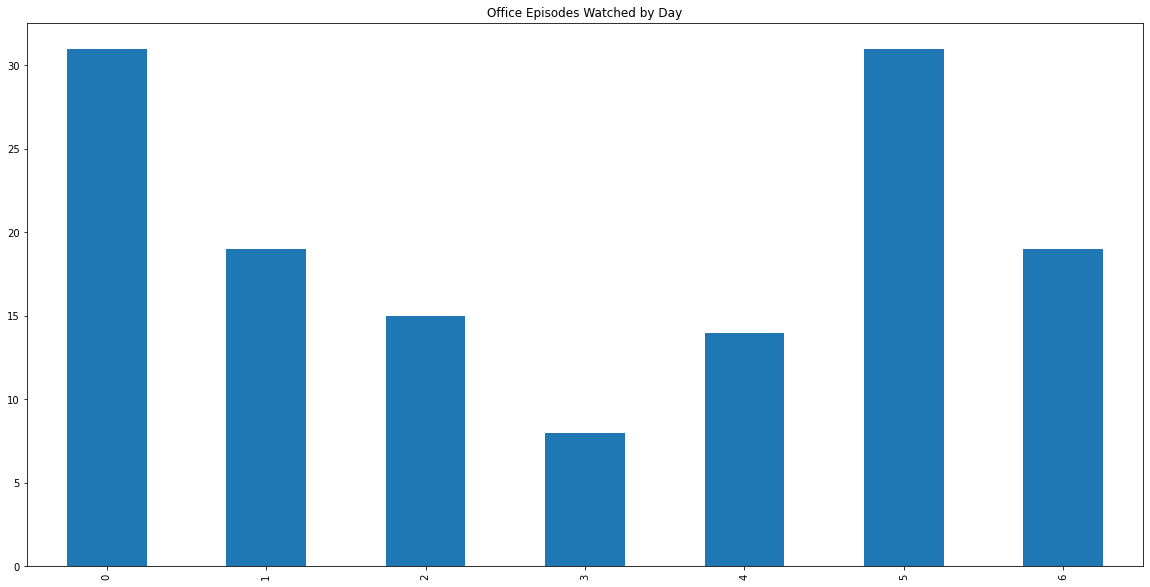

In [11]:
import pandas as pd
import matplotlib
df = pd.read_csv('ViewingActivity.csv')
print(df.shape)
df = df.drop(['Profile Name','Attributes','Supplemental Video Type','Device Type','Bookmark','Latest Bookmark','Country'], axis=1)
df['Duration'] = pd.to_timedelta(df['Duration'])
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]
office['weekday'] = office['Start Time'].dt.weekday
office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)
office_by_day = office['weekday'].value_counts()
office_by_day = office_by_day.sort_index()
office_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day')
print(office.shape)
print(office_by_day)